# Super Store Data Analysis

In [208]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import json 
import folium

%matplotlib inline
import warnings #Ignore the warnings
warnings.filterwarnings('ignore')

#!conda install -c conda-forge folium=0.5.0 --yes

## Preparing Dataset and Overview

In [283]:
#https://data.world/annjackson/2019-superstore
df_store = pd.read_csv("Superstore_2019.csv")
df_store['Total Cost']=(df_store['Sales']-df_store['Profit'])
#df_store['Unit Cost Price']=df_store['Total Cost']/df_store['Quantity']
#df_store['Unit Sales Price']=df_store['Total Cost']/df_store['Quantity']
df_store = df_store.drop(["Number of Records","Postal Code","Order ID","Customer Name","Quantity","Segment","City","Profit", "Region","Country","Order Date","Manufacturer","Product Name","Ship Date"], axis=1, inplace=False)

df_store

,Category,Discount,Sales,Ship Mode,State,Sub-Category,Total Cost
0,Furniture,0.00,261.9600,Second Class,Kentucky,Bookcases,220.0464
1,Furniture,0.00,731.9400,Second Class,Kentucky,Chairs,512.3580
2,Office Supplies,0.00,14.6200,Second Class,California,Labels,7.7486
3,Furniture,0.45,957.5775,Standard Class,Florida,Tables,1340.6085
4,Office Supplies,0.20,22.3680,Standard Class,Florida,Storage,19.8516
...,...,...,...,...,...,...,...
9989,Technology,0.20,173.6560,Standard Class,California,Phones,156.2904
9990,Technology,0.20,255.9360,Standard Class,California,Phones,227.1432
9991,Technology,0.20,3023.9280,Standard Class,California,Phones,2797.1334
9992,Technology,0.70,599.9850,Standard Class,Arizona,Machines,1079.9730


In [284]:
df_store.describe()

,Discount,Sales,Total Cost
count,9994.000000,9994.000000,9994.000000
mean,0.156203,229.858001,201.201105
std,0.206452,623.245101,550.839414
min,0.000000,0.444000,0.554400
25%,0.000000,17.280000,12.688200
50%,0.200000,54.490000,41.664000
75%,0.200000,209.940000,182.226300
max,0.800000,22638.480000,24449.558400


In [285]:
df_store.columns

Index(['Category', 'Discount', 'Sales', 'Ship Mode', 'State', 'Sub-Category',
       'Total Cost'],
      dtype='object')

## Label Encoding

In [286]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#df_store=df_store.drop(columns=['State'])
df_store['State']=le.fit_transform(df_store['State'])
category_col=['Category','Sub-Category',"Ship Mode"]
for each in category_col:
    df_store[each]=le.fit_transform(df_store[each])

#df_store['Sub-Category']=le.fit_transform(df_store['Sub-Category'])

## One Hot Encoding

In [287]:
df_store=pd.get_dummies(df_store, columns=['State'])

## Train Test Split

In [288]:
from sklearn.model_selection import train_test_split
#df_store=df_store.sort_values(by = ['Sales'])

x=df_store.drop(columns=['Sales'])
y=df_store['Sales']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05,shuffle = True, random_state=42)
y_train

4721      11.264
450       30.480
7087       4.992
7471      32.400
135       11.520
          ...   
5734    1352.032
5191      25.488
5390     539.964
860        7.360
7270     478.080
Name: Sales, Length: 9494, dtype: float64

## Model Training

In [289]:
from sklearn.model_selection import cross_val_score,LeaveOneOut
from sklearn.metrics import mean_squared_error

def train(model,x,y):
    
    model.fit(x,y)
    
    prediction=model.predict(x)
    
    
    cv_score = cross_val_score(model, x,y, scoring='neg_mean_squared_error',cv=4)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report: ")
    print("MSE",mean_squared_error(y,prediction))
    print("CV score:",cv_score)

Model Report: 
MSE 52287.33202264214
CV score: 58044.697187868966
Mean absolute error = 62.48
Mean squared error = 14300.08
Median absolute error = 39.66
Explain variance score = 0.97
R2 score = 0.97


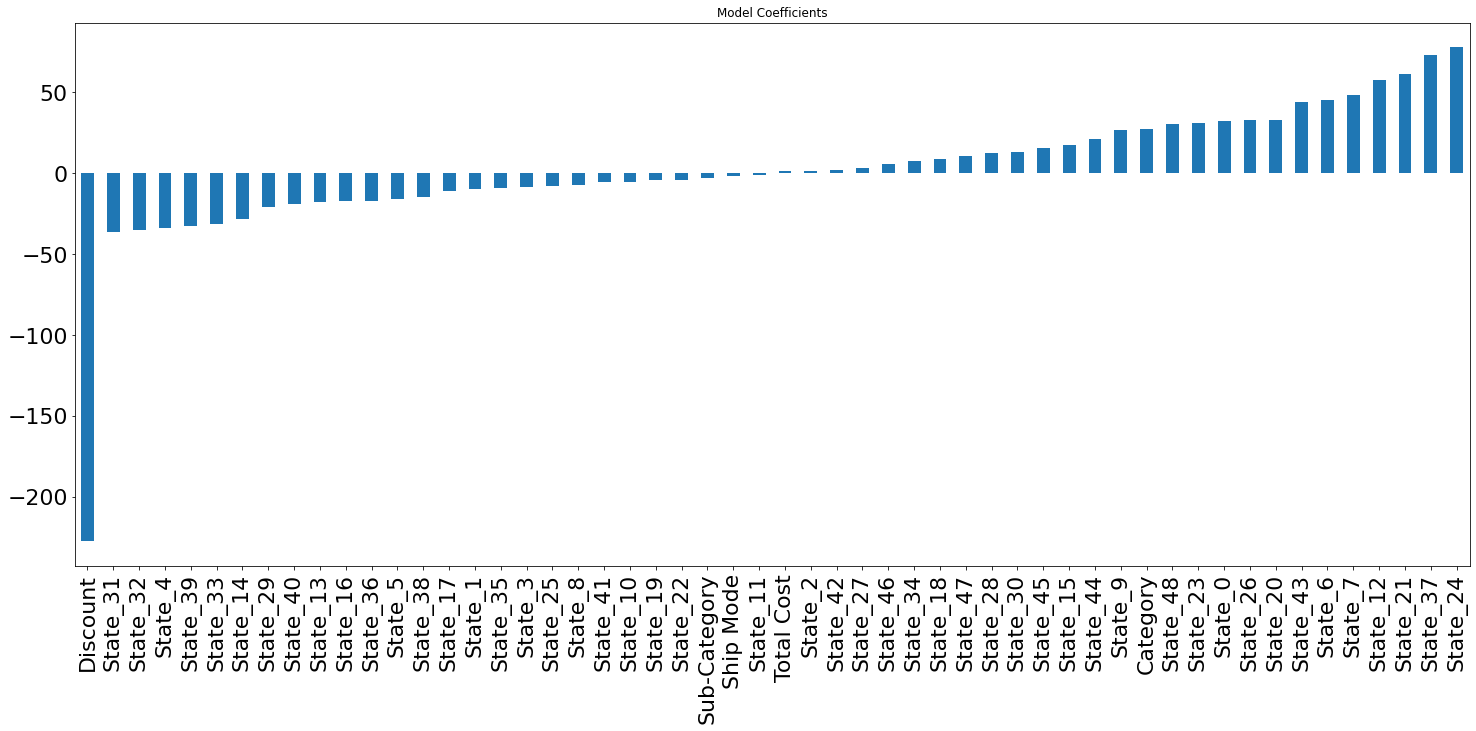

In [290]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model= LinearRegression(normalize=True)
train(model,X_train,y_train)
coef=pd.Series(model.coef_, x.columns).sort_values()
fig = plt.subplots(figsize=(25, 10))
coef.plot(kind='bar',title="Model Coefficients",fontsize=22)


predicted=model.predict(X_test)

import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_test, predicted), 2))
y_test=list(y_test)
predicted=list(predicted)
  



Model Report: 
MSE 136230.20376879396
CV score: 133064.3542155483
Mean absolute error = 156.64
Mean squared error = 121536.84
Median absolute error = 91.63
Explain variance score = 0.71
R2 score = 0.71


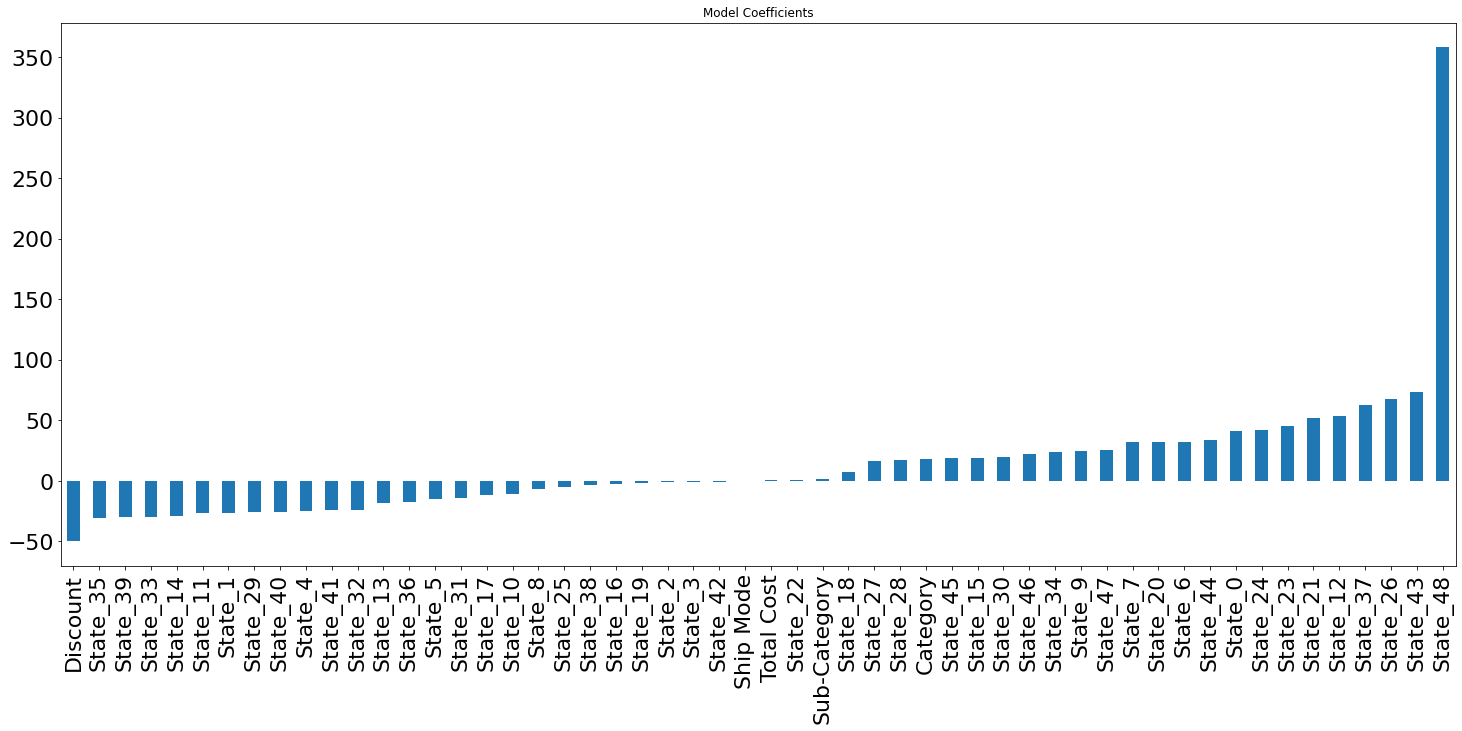

In [291]:
from sklearn.linear_model import Ridge
model= Ridge(normalize=True)
train(model,X_train,y_train)
coef=pd.Series(model.coef_, X_train.columns).sort_values()
fig, ax = plt.subplots(figsize=(25, 10))
coef.plot(kind='bar',title="Model Coefficients",ax=ax,fontsize=22)


predicted=model.predict(X_test)

import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_test, predicted), 2))
y_test=list(y_test)
predicted=list(predicted)

Model Report: 
MSE 65612.86889496473
CV score: 63549.20535041452


<AxesSubplot:title={'center':'Model Coefficients'}>

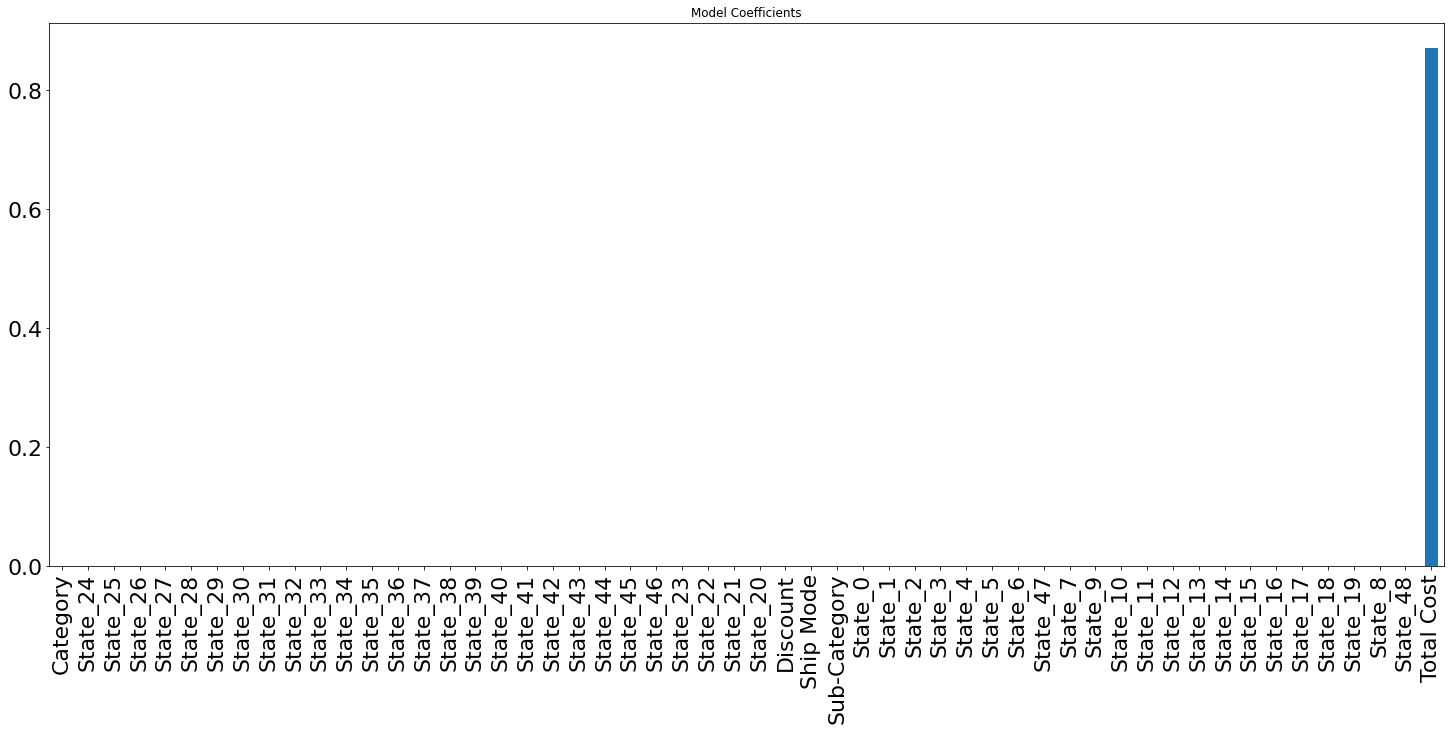

In [292]:
from sklearn.linear_model import Lasso
model= Lasso(normalize=True)
train(model,X_train,y_train)
coef=pd.Series(model.coef_, X_train.columns).sort_values()
fig= plt.subplots(figsize=(25, 10))
coef.plot(kind='bar',title="Model Coefficients",fontsize=22)

Model Report: 
MSE 5426.186012083207
CV score: 44426.97233062396


<AxesSubplot:title={'center':'Feature Importance'}>

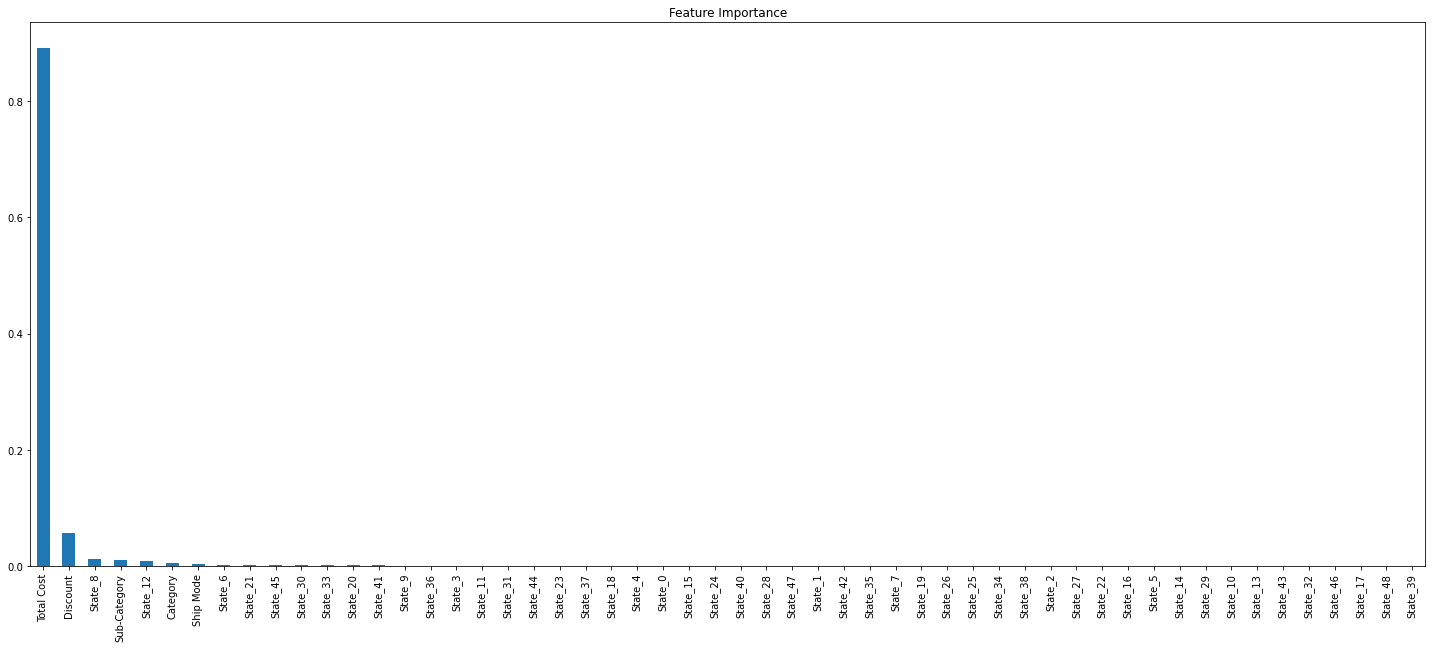

In [293]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X_train, y_train)
fig = plt.subplots(figsize=(25, 10))
coef = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report: 
MSE 2.4449121000481047e-29
CV score: 54880.866376534985
Mean absolute error = 34.6
Mean squared error = 28590.4
Median absolute error = 1.74
Explain variance score = 0.93
R2 score = 0.93


(0.7636586918632415,
 17654.938200381177,
 0.7917069830168104,
 17654.966248672332)

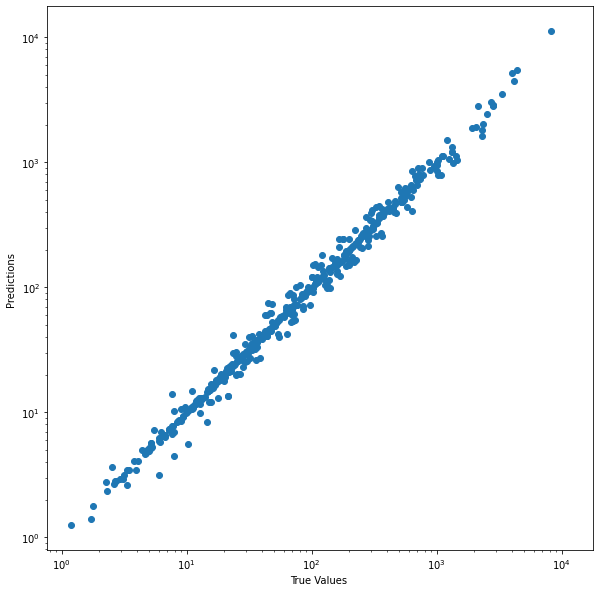

In [294]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

model = DecisionTreeRegressor()
train(model, X_train, y_train)
fig = plt.subplots(figsize=(25, 10))
coef = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
#coef.plot(kind='bar', title="Feature Importance",fontsize=22)


predicted=model.predict(X_test)

import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_test, predicted), 2))
y_test=list(y_test)
predicted=list(predicted)
  
g=plt.scatter(y_test, predicted)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')


Model Report: 
MSE 0.001239986184874597
CV score: 43332.00035559907
Mean absolute error = 23.34
Mean squared error = 7242.75
Median absolute error = 2.81
Explain variance score = 0.98
R2 score = 0.98


(0.7636586918632415, 12980.279794467862, 0.7818479444700052, 12980.29798372047)

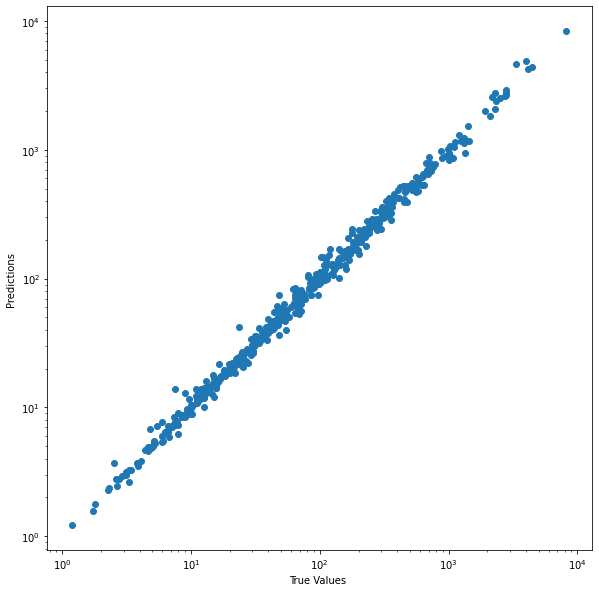

In [295]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X_train, y_train)
fig = plt.subplots(figsize=(25, 10))
coef = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
#coef.plot(kind='bar', title="Feature Importance",fontsize=22)

predicted=model.predict(X_test)

import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_test, predicted), 2))
y_test=list(y_test)
predicted=list(predicted)
  
g=plt.scatter(y_test, predicted)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')


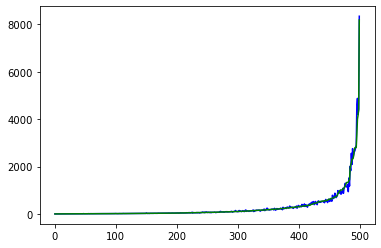

,y_test,predicted
277,1.188,1.21604
87,1.728,1.57516
452,1.788,1.78800
230,2.264,2.30390
414,2.304,2.35120
...,...,...
136,3347.370,4607.73998
28,3999.950,4878.64458
123,4158.912,4206.34860
55,4404.900,4432.76042


In [297]:
new_df = pd.DataFrame(list(zip(y_test, predicted)),
               columns =['y_test', 'predicted'])
#print(list1)

new_df=new_df.sort_values(by = ['y_test'])
plt.plot(list(new_df['predicted']),'b') 
plt.plot(list(new_df['y_test']),'g') 
plt.show()
new_df
